# GDAL - Geospatial Data Access Library

## Open dataset and fetch information

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gdal


dataset = gdal.Open('/home/vagrant/data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1')
print 'Size is %d x %d x %d' % (dataset.RasterXSize,
                                dataset.RasterYSize,
                                dataset.RasterCount)
print dataset.GetMetadata()['MPH_SENSING_START']

### Access band and fetch raw data

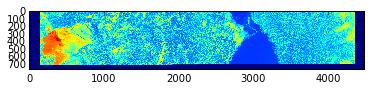

In [2]:
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()
plt.imshow(array)

### Read subsection of the image

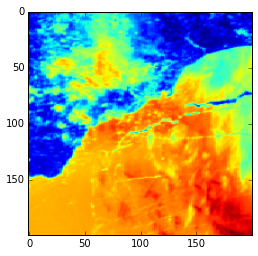

In [3]:
arr1 = band.ReadAsArray(xoff=200, yoff=200, win_xsize=200, win_ysize=200)
plt.imshow(arr1)

### Compute histogram

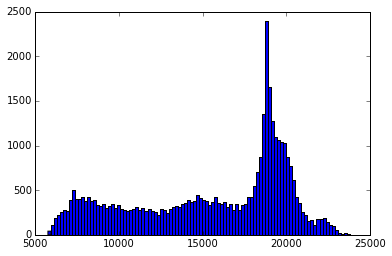

In [4]:
ans = plt.hist(arr1.flatten(), 100)

### Calculate band ratio

<matplotlib.colorbar.Colorbar instance at 0x7fea527af488>

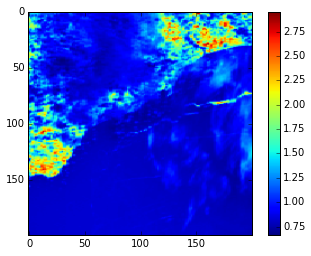

In [5]:
arr2 = dataset.GetRasterBand(8).ReadAsArray(200, 200, 200, 200).astype('float32')
plt.imshow(arr1/arr2);plt.colorbar()

### Create scatter-plot of two bands

<matplotlib.colorbar.Colorbar instance at 0x7fea52662ef0>

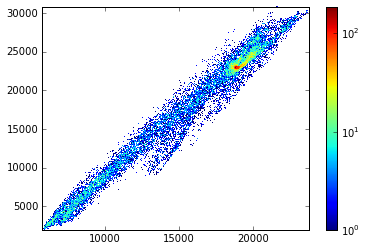

In [6]:
from matplotlib.colors import LogNorm
ans = plt.hist2d(arr1.flatten(), arr2.flatten(), 300, norm=LogNorm())
plt.colorbar()

## Command line tools

### Get information about the dataset 

In [7]:
!gdalinfo /home/vagrant/data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1

Driver: ESAT/Envisat Image Format
Files: /home/vagrant/data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1
Size is 4481, 769
Coordinate System is `'
GCP Projection = 
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        TOWGS84[0,0,0,0,0,0,0],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9108"]],
    AUTHORITY["EPSG","4326"]]
GCP[  0]: Id=1, Info=
          (0.5,0.5) -> (34.698785,61.259609,0)
GCP[  1]: Id=2, Info=
          (64.5,0.5) -> (34.429433,61.333849,0)
GCP[  2]: Id=3, Info=
          (128.5,0.5) -> (34.158807,61.407551,0)
GCP[  3]: Id=4, Info=
          (192.5,0.5) -> (33.886907,61.480712,0)
GCP[  4]: Id=5, Info=
          (256.5,0.5) -> (33.613734,61.553327,0)
GCP[  5]: Id=6, Info=
          (320.5,0.5) -> (33.339286,61.625393,0)
GCP[  6]: Id=7, Info=
          (384

### Translate data from one format to another

In [8]:
!gdal_translate -b 1 /home/vagrant/data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1 temp1.tif
!ls -l

Input file size is 4481, 769
0...10...20...30...40...50...60...70...80...90...100 - done.
total 12676
-rwxr-xr-x 1 root root     613 Sep 16 11:25 00 hello-world.ipynb
-rwxr-xr-x 1 root root   20062 Sep 16 11:25 01 basic types.ipynb
-rwxr-xr-x 1 root root   12861 Sep 16 11:25 03 object oriented programming.ipynb
-rwxr-xr-x 1 root root  513410 Sep 16 11:25 05 advanced plotting.ipynb
-rwxr-xr-x 1 root root  626660 Sep 16 11:25 06 scipy.ipynb
-rwxr-xr-x 1 root root  448504 Sep 16 11:25 07 GDAL.ipynb
-rwxr-xr-x 1 root root  269087 Sep 16 11:25 08 Basemap.ipynb
-rwxr-xr-x 1 root root  137920 Sep 16 11:25 09 Nansat introduction.ipynb
-rwxr-xr-x 1 root root  176705 Sep 16 11:25 10 Nansat Use Case 01.ipynb
-rwxr-xr-x 1 root root  171739 Sep 16 11:25 11 Nansat Use Case 02.ipynb
-rwxr-xr-x 1 root root 3343671 Sep 16 11:25 12 Nansat Use Case 03.ipynb
-rwxr-xr-x 1 root root  273062 Sep 16 11:25 13 Django example.ipynb
drwxr-xr-x 2 root root    4096 Sep 16 11:25 data
drwxr-xr-x 2 root root    4096 S

### Reproject data from one grid to another

In [9]:
!gdalwarp -t_srs '+proj=longlat' -te 12 61 34 65 -ts 0.1 0.1 -overwrite temp1.tif  temp2.tif

Creating output file that is 4399P x 800L.
Processing input file temp1.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.


### View results of reprojection

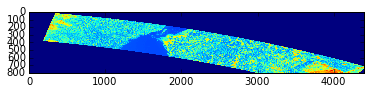

In [10]:
ds = gdal.Open('temp2.tif')
b = ds.GetRasterBand(1)
a = b.ReadAsArray()
plt.imshow(a)